<a href="https://colab.research.google.com/github/yh0010/Graduate_Program_Records/blob/main/MoviePref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Load data into colab

from google.colab import files
uploaded = files.upload()

Saving MoviePrefm.csv to MoviePrefm (1).csv


In [34]:
# Import pandas to create dataframe

import pandas as pd

# **Part 1 Data Preparation**

In [124]:
# Read data from .csv file into dataframe
df = pd.read_csv('MoviePrefm.csv')

df #see the original table formatting


,Unnamed: 0,The Piano,Pulp Fiction,Clueless,Cliffhanger,Fargo
0,Ken+,1,1,0,1,?
1,Ken-,0,0,1,0,?
2,Amy+,0,0,1,0,0
3,Amy-,1,1,0,1,1
4,Jef+,0,1,0,0,1
5,Jef-,1,0,1,1,0
6,Mike+,1,1,0,1,1
7,Mike-,0,0,1,0,0
8,Chris+,0,0,1,0,0
9,Chris-,0,1,0,1,1


In [36]:
#drop the row for prediction
df_copy0 = df.copy()
df_copy0 = df_copy0.transpose() #put user name as columns

df_copy0.columns = df_copy0.iloc[0] #use names as columns

df_copy0 = df_copy0.transpose()

df_copy0 = df_copy0.drop(columns='Unnamed: 0')

df_copy0 = df_copy0.transpose()
df_copy0 = df_copy0.drop(columns=['Ken+', 'Ken-']) #delete predicting subject

print(df_copy0.columns.values) #double check the columns are reflected
df_copy0 #print out the entire transposed table

['Amy+' 'Amy-' 'Jef+' 'Jef-' 'Mike+' 'Mike-' 'Chris+' 'Chris-']


Unnamed: 0,Amy+,Amy-,Jef+,Jef-,Mike+,Mike-,Chris+,Chris-
The Piano,0,1,0,1,1,0,0,0
Pulp Fiction,0,1,1,0,1,0,0,1
Clueless,1,0,0,1,0,1,1,0
Cliffhanger,0,1,0,1,1,0,0,1
Fargo,0,1,1,0,1,0,0,1


In [37]:
#prep for another set of testing, without fargo
df0 = df.copy()
df0 = df0.drop(columns="Fargo")
Ndummies2 = ['Amy-', 'Jef-', 'Mike-', 'Chris-', 'Ken-']
df0 = df0.transpose()
df1 = df0.copy()
df1.columns = df1.iloc[0]
df1 = df1.drop(columns=Ndummies2)
df2 = df1.copy()
df2 = df2.transpose()
df2 = df2.drop(columns=['Unnamed: 0'])
df2 = df2.transpose()
df2 #dataset with only positive mark, contains all 5 persons, without Fargo

Unnamed: 0,Ken+,Amy+,Jef+,Mike+,Chris+
The Piano,1,0,0,1,0
Pulp Fiction,1,0,1,1,0
Clueless,0,1,0,0,1
Cliffhanger,1,0,0,1,0


In [40]:
df_copy1 = df_copy0.copy()
df_copy2 = df_copy0.copy()

Ndummies = ['Amy-', 'Jef-', 'Mike-', 'Chris-']

df_copy1 = df_copy1.drop(columns=Ndummies)

display(df_copy1) #dataset with only positive mark, contains all 5 movies, without Ken

Unnamed: 0,Amy+,Jef+,Mike+,Chris+
The Piano,0,0,1,0
Pulp Fiction,0,1,1,0
Clueless,1,0,0,1
Cliffhanger,0,0,1,0
Fargo,0,1,1,0


# **Part 2 Modeling**

https://people.revoledu.com/kardi/tutorial/Similarity/SimpleMatching.html

Simple Matching Coefficient (for binary values)

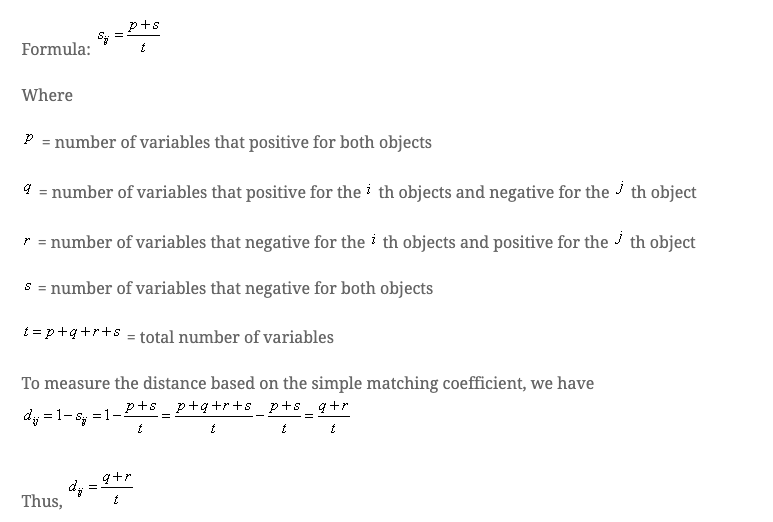

Below: Use brute-force method to match 2 person's recommendation distance, do this for the entire list. Total of 6 times matching happened.

This means that each individual compares with the remaining 3 persons for distance. (n_neighbors=3)
Since the training list only contains 4 persons total, it is best to match all of them with each other.

In [111]:
#adding feature, to make the print more presentable
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [112]:
names2 = ["Ken+","Amy+", "Jef+", "Mike+", "Chris+"]
KenDict = dict()

def distance_coeff(p,q,r,s):
  t = p+q+r+s #4 variables
  coeff = (p+s)/t
  distance = 1 - coeff
  # print("distance:",distance)
  # print("coeff:",coeff)
  print(' ',"coeff:",coeff)
  print(color.BOLD,color.BLUE , "distance:",distance , color.END)
  return distance

for i in names2:
  position = len(names2)-1 - names2.index(i)
  # print("position:",position)
  if position != 0:
    for k in range(position):
      if i == "Ken+":print(color.BOLD,i,"with",names2[k+1],color.END)
      elif i == "Amy+":print(color.BOLD,i,"with",names2[k+2],color.END)
      elif i == "Jef+": print(color.BOLD,i,"with",names2[k+3],color.END)
      elif i == "Mike+": print(color.BOLD,i,"with",names2[k+4],color.END)
      # print("k:",k)
      p = 0 # both are positive
      q = 0 # A is positive while B is negative
      r = 0 # A is negative while B is positive
      s = 0 # both are negative
      for j in range(4):
        if df2[i].iloc[j] == df2[names2[names2.index(i)+k+1]].iloc[j]:
          if df2[i].iloc[j] == 1:
            p += 1
          else:
            s += 1
        else:
          if pd.to_numeric(df2[i]).iloc[j] == 1:
            q += 1
          else:
            r += 1
      print(' ','p:',p,'q:',q,'r:',r,'s:',s)
      result2 = distance_coeff(p,q,r,s)
      print('\n')
      if i == "Ken+":
        KenDict[i + " with " + names2[k+1]] = result2

KenDict

 Ken+ with Amy+ 
  p: 0 q: 3 r: 1 s: 0
  coeff: 0.0
  distance: 1.0 


 Ken+ with Jef+ 
  p: 1 q: 2 r: 0 s: 1
  coeff: 0.5
  distance: 0.5 


 Ken+ with Mike+ 
  p: 3 q: 0 r: 0 s: 1
  coeff: 1.0
  distance: 0.0 


 Ken+ with Chris+ 
  p: 0 q: 3 r: 1 s: 0
  coeff: 0.0
  distance: 1.0 


 Amy+ with Jef+ 
  p: 0 q: 1 r: 1 s: 2
  coeff: 0.5
  distance: 0.5 


 Amy+ with Mike+ 
  p: 0 q: 1 r: 3 s: 0
  coeff: 0.0
  distance: 1.0 


 Amy+ with Chris+ 
  p: 1 q: 0 r: 0 s: 3
  coeff: 1.0
  distance: 0.0 


 Jef+ with Mike+ 
  p: 1 q: 0 r: 2 s: 1
  coeff: 0.5
  distance: 0.5 


 Jef+ with Chris+ 
  p: 0 q: 1 r: 1 s: 2
  coeff: 0.5
  distance: 0.5 


 Mike+ with Chris+ 
  p: 0 q: 3 r: 1 s: 0
  coeff: 0.0
  distance: 1.0 




{'Ken+ with Amy+': 1.0,
 'Ken+ with Chris+': 1.0,
 'Ken+ with Jef+': 0.5,
 'Ken+ with Mike+': 0.0}

Above: The distance that's closer to 1, the less similar are these 2 person's recommendations.

In [123]:
arr = []
def searchSmall(arr, dictionary):
  for key,val in dictionary.items():
    arr.append(val)

  arr.sort()
  arr[0]

  for key,val in dictionary.items():
    if val == arr[0]:
      return key,val
    if val == arr[1]:
      print(key, val)

searchSmall(arr, KenDict) #this returns the persons who have the closest distance with target person, in this case, is Mike with Ken on 0.0, then next person is Jef

Ken+ with Jef+ 0.5


('Ken+ with Mike+', 0.0)

In [114]:
names = ["Amy+", "Jef+", "Mike+", "Chris+"]
allDict = dict()

def distance_coeff(p,q,r,s):
  t = p+q+r+s #4 variables
  coeff = (p+s)/t
  distance = 1 - coeff
  print(' ',"coeff:",coeff)
  print(color.BOLD,color.BLUE , "distance:",distance , color.END)
  return distance

for i in names:
  position = len(names)-1 - names.index(i)
  # print("position:",position)
  if position != 0:
    for k in range(position):
      if i == "Amy+":print(color.BOLD,i,"with",names2[k+2],color.END)
      elif i == "Jef+":print(color.BOLD,i,"with",names2[k+3],color.END)
      elif i == "Mike+": print(color.BOLD,i,"with",names2[k+4],color.END)
      # print("k:",k)
      p = 0 # both are positive
      q = 0 # A is positive while B is negative
      r = 0 # A is negative while B is positive
      s = 0 # both are negative
      for j in range(5):
        if df_copy1[i].iloc[j] == df_copy1[names[names.index(i)+k+1]].iloc[j]:
          if df_copy1[i].iloc[j] == 1:
            p += 1
          else:
            s += 1
        else:
          if pd.to_numeric(df_copy1[i]).iloc[j] == 1:
            q += 1
          else:
            r += 1
      print(' ','p:',p,'q:',q,'r:',r,'s:',s)
      result = distance_coeff(p,q,r,s)
      print('\n')
      if i == "Amy+":
        allDict[i+" with "+names2[k+2]] = result
      elif i == "Jef+":
        allDict[i+" with "+names2[k+3]] = result
      elif i == "Mike+":
        allDict[i+" with "+names2[k+4]] = result
allDict

 Amy+ with Jef+ 
  p: 0 q: 1 r: 2 s: 2
  coeff: 0.4
  distance: 0.6 


 Amy+ with Mike+ 
  p: 0 q: 1 r: 4 s: 0
  coeff: 0.0
  distance: 1.0 


 Amy+ with Chris+ 
  p: 1 q: 0 r: 0 s: 4
  coeff: 1.0
  distance: 0.0 


 Jef+ with Mike+ 
  p: 1 q: 0 r: 2 s: 2
  coeff: 0.6
  distance: 0.4 


 Jef+ with Chris+ 
  p: 0 q: 2 r: 1 s: 2
  coeff: 0.4
  distance: 0.6 


 Mike+ with Chris+ 
  p: 0 q: 4 r: 1 s: 0
  coeff: 0.0
  distance: 1.0 




{'Amy+ with Chris+': 0.0,
 'Amy+ with Jef+': 0.6,
 'Amy+ with Mike+': 1.0,
 'Jef+ with Chris+': 0.6,
 'Jef+ with Mike+': 0.4,
 'Mike+ with Chris+': 1.0}

In [115]:
targetDict = dict()
for key,val in allDict.items():
  if key.find("Mike") >= 0:
    targetDict[key] = val
arr2 = []
matchResult = searchSmall(arr2, targetDict)
matchResult #this return any person that has the closest distance with target person, in this case is Jef that's closest to Mike based on 5 movies recommendation distance

('Jef+ with Mike+', 0.4)

In [116]:
#use for below highlight chart
df_chart = df.copy()
df_chart = df_chart.transpose()
df_chart.columns = df_chart.iloc[0]
df_chart = df_chart.drop(columns=Ndummies2)
df_chart = df_chart.transpose()
df_chart = df_chart.drop(columns='Unnamed: 0')
df_chart = df_chart.transpose()
df_chart2 = df_chart.copy()
df_chart

Unnamed: 0,Ken+,Amy+,Jef+,Mike+,Chris+
The Piano,1,0,0,1,0
Pulp Fiction,1,0,1,1,0
Clueless,0,1,0,0,1
Cliffhanger,1,0,0,1,0
Fargo,?,0,1,1,0


In [122]:
import numpy as np
def highlight_greater(x):
    y = 'yellow'
    m1 = x['Mike+'] == x['Jef+']
    m2 = x['Ken+'] == x['Jef+']
    m3 = x['Jef+'] == x['Mike+']

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Mike+'] = np.where(m1, 'background-color: {}'.format(y), df1['Jef+'])
    df1['Ken+'] = np.where(m2, 'background-color: {}'.format(y), df1['Mike+'])
    df1['Jef+'] = np.where(m3, 'background-color: {}'.format(y), df1['Mike+'])
    return df1


display(df_chart.style.apply(highlight_greater, axis=None))

def highlight_greater(x):
    y = 'orange'
    m = x['Jef+'] <= x['Mike+']

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Mike+'] = np.where(m, 'background-color: {}'.format(y), df1['Mike+'])
    df1['Ken+'] = np.where(m, 'background-color: {}'.format(y), df1['Ken+'])
    return df1


display(df_chart2.style.apply(highlight_greater, axis=None))

Unnamed: 0,Ken+,Amy+,Jef+,Mike+,Chris+
The Piano,1,0,0,1,0
Pulp Fiction,1,0,1,1,0
Clueless,0,1,0,0,1
Cliffhanger,1,0,0,1,0
Fargo,?,0,1,1,0


Unnamed: 0,Ken+,Amy+,Jef+,Mike+,Chris+
The Piano,1,0,0,1,0
Pulp Fiction,1,0,1,1,0
Clueless,0,1,0,0,1
Cliffhanger,1,0,0,1,0
Fargo,?,0,1,1,0


Based on the distance, considering Ken and Mike has a 0.0 distance, which is overlapping, then Ken will be 100% likely to recommend Fargo as Mike does.
If consider Ken's nearest 2 neighbor which are Mike(0.0) and Jef(0.5), then Ken will be 75% likely to recommend Fargo as both Mike and Jef do.

# **Part 3 Sklearn Package Testing**


In [ ]:
df00 = df.copy()
df00 = df00.transpose()
df00.columns = df00.iloc[0]
df00 = df00.drop(columns=['Amy-', 'Jef-', 'Mike-', 'Chris-', 'Ken-', 'Ken+'])
df00 = df00.transpose()
df00 = df00.drop(columns='Unnamed: 0')
fargo = df00['Fargo']
df00 = df00.drop(columns='Fargo')
display(df00)
print(fargo)
#this dataset excludes Fargo and Ken

,The Piano,Pulp Fiction,Clueless,Cliffhanger
Unnamed: 0,,,,
Amy+,0,0,1,0
Jef+,0,1,0,0
Mike+,1,1,0,1
Chris+,0,0,1,0


Unnamed: 0
Amy+      0
Jef+      1
Mike+     1
Chris+    0
Name: Fargo, dtype: object


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# y is the dependent variable, Fargo(testing dataset)
# X is the training dataset
y = fargo
X = df00

clf = KNeighborsClassifier(metric='euclidean', n_neighbors=3).fit(X,y)

# Report the performance over the test partition

from sklearn import metrics

model_object = clf

# obtain the AUC of the k-NN model
print(metrics.roc_auc_score(y, clf.predict_proba(X)[:, 1]))

1.0




---


AUC measures of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In the end, 1.0 is the highest score in AUC. This shows the training dataset(everyone except Ken and all movie except Fargo) classifies highly accurately on the testing dataset(Fargo without Ken), thus supports my model's positive performance which is based on simple matching coefficient algorithm.


---

